In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "Patient_data.csv.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      15000 non-null  int64 
 1   Name            15000 non-null  object
 2   Age             15000 non-null  int64 
 3   Gender          15000 non-null  object
 4   Weight          15000 non-null  int64 
 5   Height          15000 non-null  int64 
 6   Diabetes        15000 non-null  int64 
 7   Hypertension    15000 non-null  int64 
 8   Blood_Sugar     15000 non-null  int64 
 9   BP_Systolic     15000 non-null  int64 
 10  BP_Diastolic    15000 non-null  int64 
 11  Cholesterol     15000 non-null  int64 
 12  Smoking         15000 non-null  int64 
 13  Alcohol         15000 non-null  int64 
 14  Exercise_Hours  15000 non-null  int64 
 15  Sleep_Hours     15000 non-null  int64 
 16  Allergies       15000 non-null  object
 17  Treatment       15000 non-null  object
dtypes: int

,Patient_ID,Name,Age,Gender,Weight,Height,Diabetes,Hypertension,Blood_Sugar,BP_Systolic,BP_Diastolic,Cholesterol,Smoking,Alcohol,Exercise_Hours,Sleep_Hours,Allergies,Treatment
0,1,Valerie Williams,71,F,67,173,0,1,207,99,106,128,0,0,4,7,None,Lisinopril
1,2,Kelly Gilbert,34,F,53,190,0,0,196,139,114,255,0,0,9,4,None,Statins
2,3,Lee Velez,80,M,60,196,1,0,237,123,88,134,0,0,3,7,Penicillin,Metformin
3,4,Brandon Wright,40,F,55,177,0,0,178,140,83,112,1,1,4,4,None,No Medication
4,5,Shawn Garza,43,M,100,196,0,1,163,161,101,278,0,0,1,8,None,Lisinopril|Statins


In [2]:

# Drop unique identifier columns if they are not useful
df.drop(columns=['Patient_ID', 'Name'], inplace=True)


In [3]:

# Check for missing values
print(df.isnull().sum())

# Fill missing values for categorical columns with "Unknown"
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Fill missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


Age               0
Gender            0
Weight            0
Height            0
Diabetes          0
Hypertension      0
Blood_Sugar       0
BP_Systolic       0
BP_Diastolic      0
Cholesterol       0
Smoking           0
Alcohol           0
Exercise_Hours    0
Sleep_Hours       0
Allergies         0
Treatment         0
dtype: int64


In [4]:

# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [5]:

# Label Encoding for binary categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encoding for categorical variables with multiple categories
df = pd.get_dummies(df, columns=['Allergies', 'Treatment'], drop_first=True)


In [6]:

# Standardization using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Normalization using MinMaxScaler (Alternative approach)
# min_max_scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)


In [7]:

# Removing outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [8]:

# Split dataset into features and target variable
X = df.drop(columns=['Diabetes'])  # Assuming 'Diabetes' is the target variable
y = df['Diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_sm.value_counts())


Original class distribution: 0    8385
1    3615
Name: Diabetes, dtype: int64
Resampled class distribution: 0    8385
1    8385
Name: Diabetes, dtype: int64


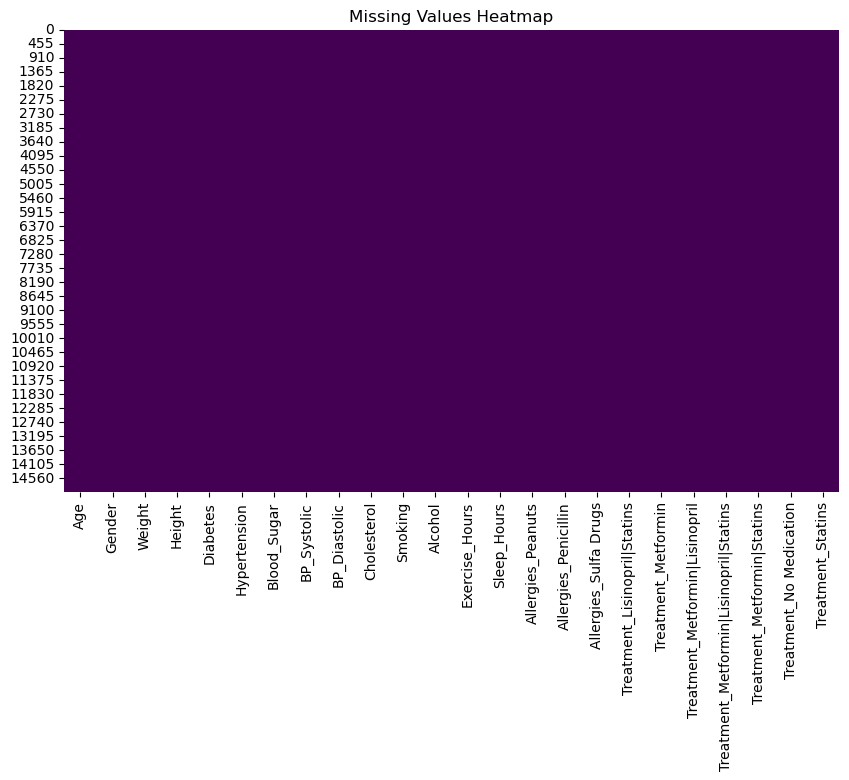

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


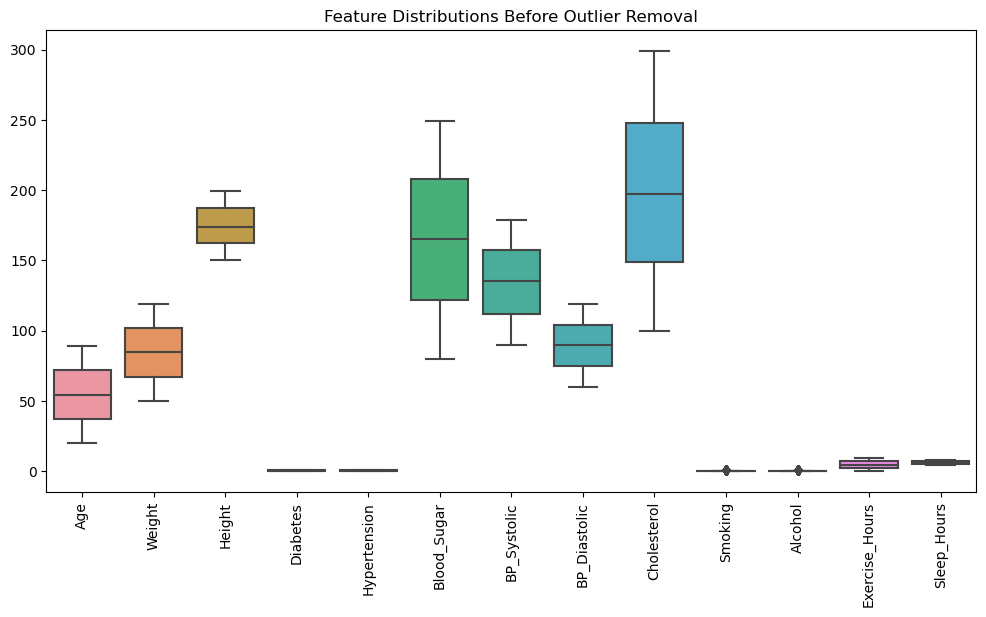

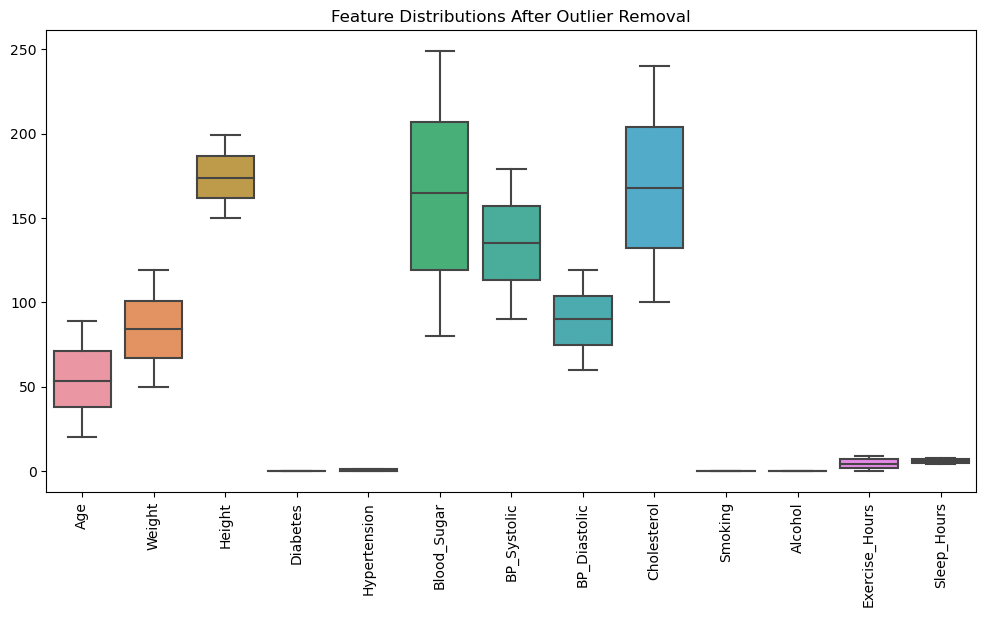

In [11]:

# Boxplot before outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Feature Distributions Before Outlier Removal")
plt.show()

# Boxplot after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Feature Distributions After Outlier Removal")
plt.show()


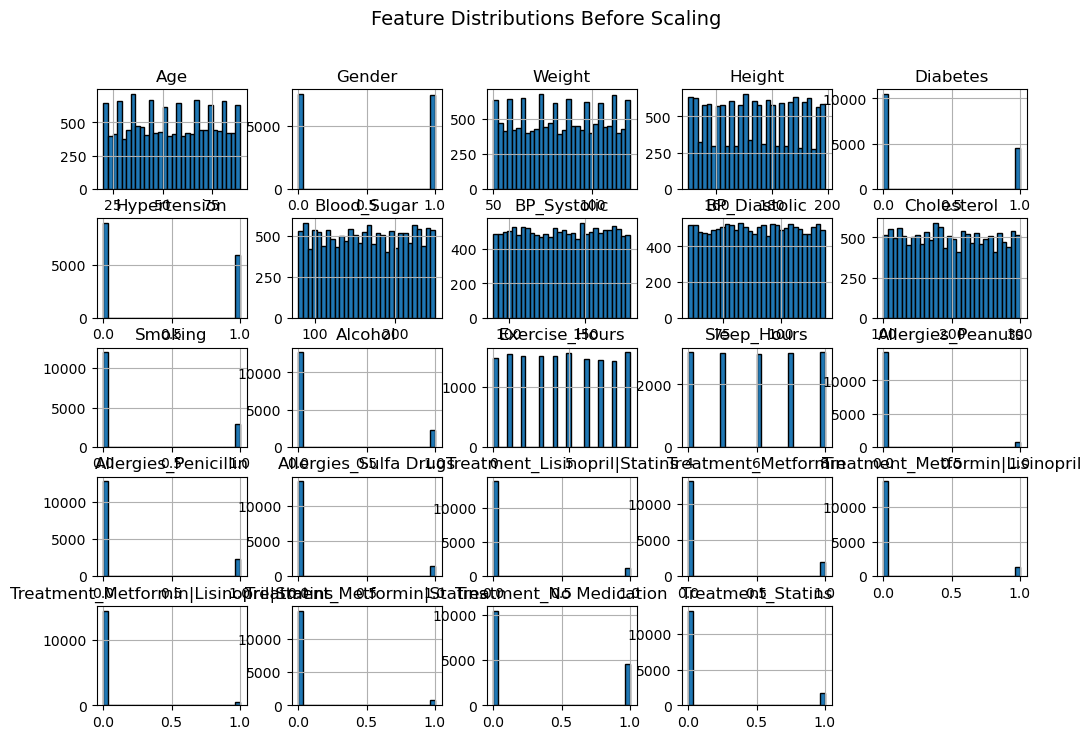

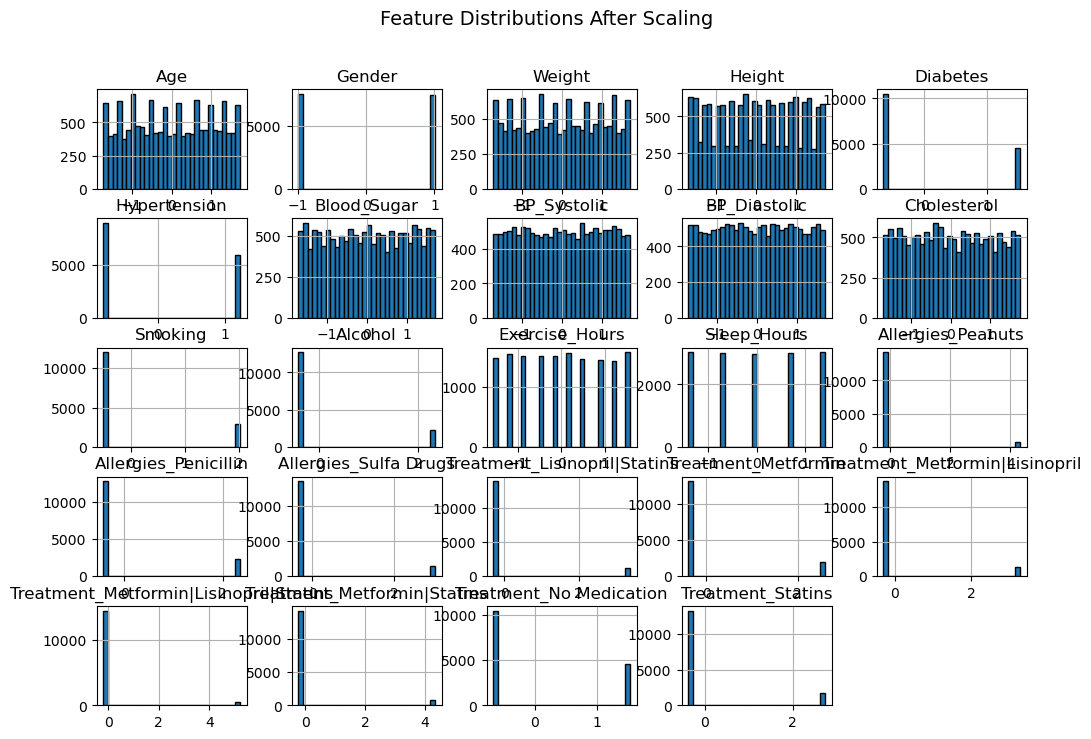

In [12]:

# Histogram before scaling
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions Before Scaling", fontsize=14)
plt.show()

# Histogram after scaling
df_scaled.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions After Scaling", fontsize=14)
plt.show()


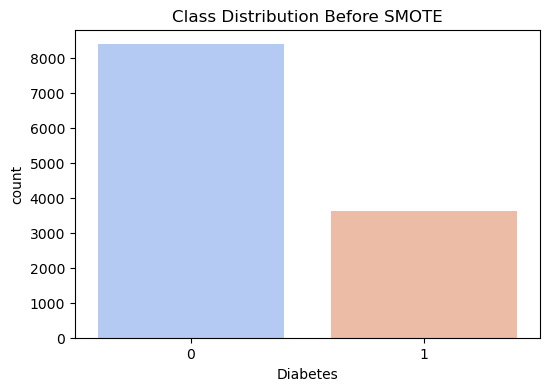

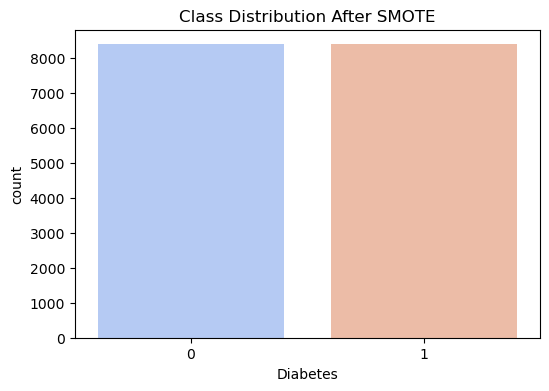

In [13]:

# Class distribution before SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='coolwarm')
plt.title("Class Distribution Before SMOTE")
plt.show()

# Class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_sm, palette='coolwarm')
plt.title("Class Distribution After SMOTE")
plt.show()


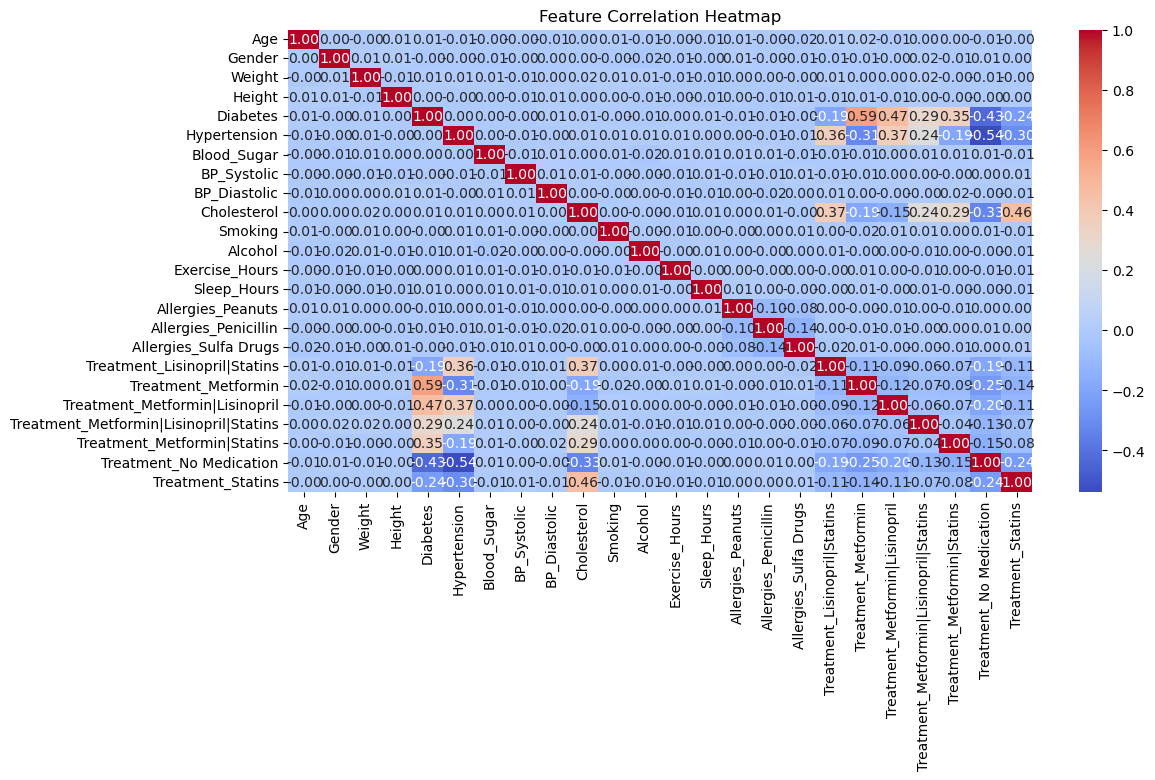

In [14]:

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()
